In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = r"/Users/drewmichael/ffmpeg/bin/ffmpeg"

In [3]:
class electron:
    def __init__(self):
        self.x = []
        self.y = []
        self.v = []

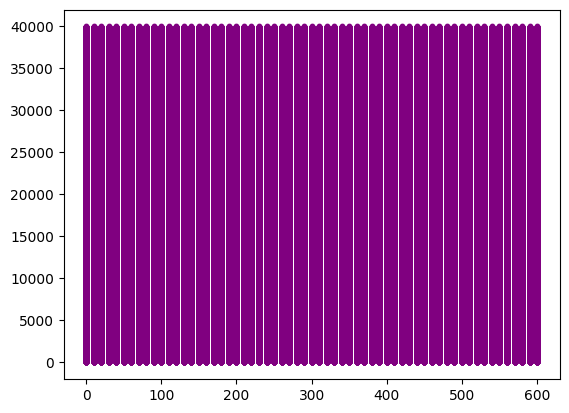

In [60]:
grid_x = 600 # Defining matrix of cations
grid_y = 40000
vel = np.array([np.random.randint(1.0), np.random.randint(1.0)]) # velocity of electron
acc = np.array([0, 5.0]) # acceleration of electron

x, y = np.meshgrid(np.arange(0, grid_x+1, 10), np.arange(0, grid_y+1, 10))
plt.scatter(x, y, color='purple', s=10)

In [44]:
def get_x0_and_v0_bruh():
    x0 = np.random.randint(grid_x)
    v0 = np.array([np.random.uniform(-1, 1), np.random.uniform(0, 1)])
    return [x0, v0]

In [45]:
positions = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
#print(electron())

def get_distances(pos):
    distances = []
    xdiffs = []
    ydiffs = []
    for i in positions: 
        x_diff = pos[0] - i[0]
        y_diff = pos[1] - i[1]
        xdiffs.append(x_diff)
        ydiffs.append(y_diff)
        distances.append(np.sqrt(x_diff**2 + y_diff**2))
    return [distances, xdiffs, ydiffs]

def get_min_distance(pos): # faster version of function that works for grid
    x_diff = (pos[0]+5)%10-5
    y_diff = (pos[1]+5)%10-5
    sqdist = x_diff**2 + y_diff**2
    return [x_diff, y_diff, sqdist]


1000


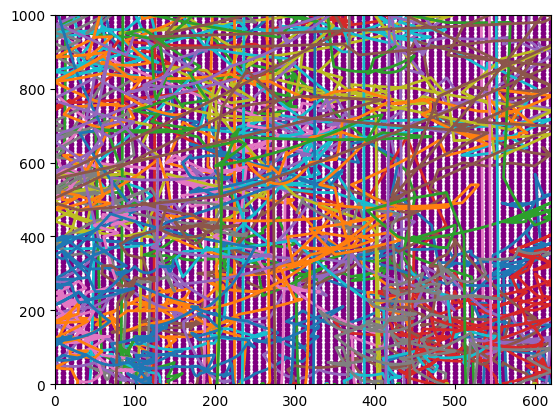

In [50]:
r = 1.5 # 
cor = 0.9 # coefficient of restitution

electrons = [electron() for i in range(100)]

for i in electrons:
    i.x.append(get_x0_and_v0_bruh()[0])
    i.y.append(0)
    i.v.append(get_x0_and_v0_bruh()[1])

for i in electrons: 
    counter = 1
    while counter < 1000:
        d = get_min_distance([i.x[-1], i.y[-1]])
        if (0 < d[2] < r**2):
            diff = np.array([d[0],d[1]])
            i.v.append(i.v[-1] - (1+cor) * ((np.dot(i.v[-1], diff))/(d[2]) * diff))
        elif i.x[-1] > grid_x or i.x[-1] < 0:
            i.v.append(np.array(-i.v[-1][0],i.v[-1][1]) + acc * 0.1)
        else:
            i.v.append(i.v[-1] + acc * 0.1)
        i.x.append(i.x[-1] + i.v[-1][0]*0.1)
        i.y.append(i.y[-1] + i.v[-1][1]*0.1)
        counter = counter + 1



fig, ax = plt.subplots()
plt.xlim([0, grid_x])
plt.ylim([0, 1000])

lines = []
X_data = []
Y_data = []

for i in electrons:
    line, = ax.plot([], [], lw=2)
    lines.append(line)
    X_data.append(i.x)
    Y_data.append(i.y)

def update(num, X_data, Y_data, lines):
    for i, line in enumerate(lines):
        line.set_data(X_data[i][:num], Y_data[i][:num])
    return lines

length = max([len(i.x) for i in electrons])

print(length)

plt.scatter(x, y, color='purple', s=10)
ani = animation.FuncAnimation(fig, update, frames=1000, 
                              fargs=(X_data, Y_data, lines), interval=100, blit=True)

writervideo = animation.FFMpegWriter(fps=120)
ani.save("animation.mp4", writer=writervideo)

plt.show()

'\nlength = max([len(i.x) for i in electrons])\n\nprint(length)\n\nplt.scatter(x, y, color=\'purple\', s=0.1)\nani = animation.FuncAnimation(fig, update, frames=1000, \n                              fargs=(X_data, Y_data, lines), interval=100, blit=True)\n\nwritervideo = animation.FFMpegWriter(fps=120)\nani.save("animation.mp4", writer=writervideo)\n\nplt.show()\n'

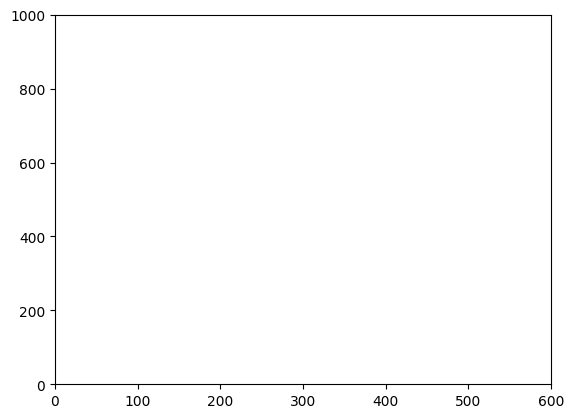

In [68]:
r = 1.5 # 
cor = 0.7 # coefficient of restitution

numelectrons = 10000

electrons = [electron() for i in range(numelectrons)]

for i in electrons:
    i.x.append(get_x0_and_v0_bruh()[0])
    i.y.append(0)
    i.v.append(get_x0_and_v0_bruh()[1])

for i in electrons: 
    counter = 1
    while counter < 1000:
        d = get_min_distance([i.x[-1], i.y[-1]])
        if (0 < d[2] < r**2):
            diff = np.array([d[0],d[1]])
            i.v.append(i.v[-1] - (1+cor) * ((np.dot(i.v[-1], diff))/(d[2]) * diff))
        elif i.x[-1] > grid_x or i.x[-1] < 0:
            i.v.append(np.array(-i.v[-1][0],i.v[-1][1]) + acc * 0.1)
        else:
            i.v.append(i.v[-1] + acc * 0.1)
        i.x.append(i.x[-1] + i.v[-1][0]*0.1)
        i.y.append(i.y[-1] + i.v[-1][1]*0.1)
        counter = counter + 1



fig, ax = plt.subplots()
plt.xlim([0, grid_x])
plt.ylim([0, 1000])

lines = []
X_data = np.zeros(1000)
Y_data = np.zeros(1000)

line, = ax.plot([], [], lw=2)
lines.append(line)

for i in electrons:
    X_data = X_data + np.asarray(i.x)
    Y_data = Y_data + np.asarray(i.y)

X_data = X_data / numelectrons
Y_data = Y_data / numelectrons

def update(num, X_data, Y_data, lines):
    line.set_data(X_data[:num], Y_data[:num])
    return lines

"""
length = max([len(i.x) for i in electrons])

print(length)

plt.scatter(x, y, color='purple', s=0.1)
ani = animation.FuncAnimation(fig, update, frames=1000, 
                              fargs=(X_data, Y_data, lines), interval=100, blit=True)

writervideo = animation.FFMpegWriter(fps=120)
ani.save("animation.mp4", writer=writervideo)

plt.show()
"""

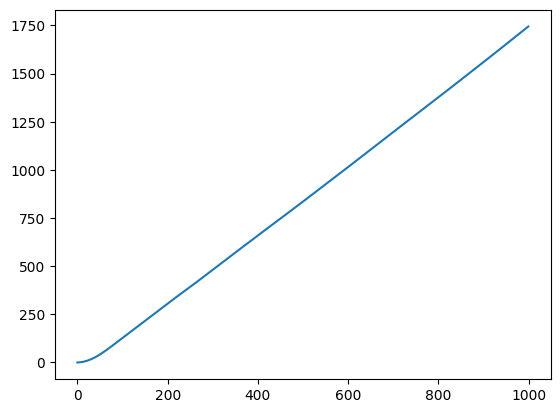

In [69]:
plt.plot(Y_data)

In [70]:
(Y_data[883]-Y_data[112])/771

np.float64(1.7901493558599586)